# Тема и цель исследования

### Тема зачетного проекта:
Анализ рынка труда мигрантов *(с уклоном на граждан из стран СНГ)* в США: зарплаты, востребованные профессии, география и влияние ключевых факторов на трудоустройство.

### Цель:
Целью данного исследования является выявление особенностей рынка труда для мигрантов в США с фокусом на граждан СНГ, определение ключевых факторов, влияющих на зарплаты и трудоустройство, а также сравнение доходов мигрантов в США с аналогичными профессиями в России.

### Источник данных:  
Датасет *USA Foreign Worker’s Salary* из открытого источника на платформе Kaggle (https://www.kaggle.com/datasets/sujan97/usa-foreign-workers-salary).  

### Описание данных: 
Датасет **USA Foreign Worker's Salary** содержит подробную информацию о заявках на рабочие визы, полученных правительством США в период с 2008 по 2015 годы.  В нем представлены различные неличные сведения о заявителях, включая:

- **Профессия**: должность или специальность заявителя.
- **Заработная плата**: годовая оплата труда.
- **Компания-спонсор**: организация, подающая петицию на получение визы для работника.
- **Статус визы**: результат рассмотрения заявки (одобрено или отклонено).


# 0. Библиотеки и предобработка данных  

### Описание этапа:  
На этом этапе были подключены необходимые библиотеки для анализа данных и выполнена базовая предобработка данных.  

### Основные шаги:  
1. **Импорт библиотек:**  
   Для анализа данных использовались библиотеки:  
   - `pandas` для обработки данных;  
   - `matplotlib` и `seaborn` для визуализации;  
   - другие вспомогательные библиотеки для анализа и работы с датами.  

2. **Предобработка данных:**  
   - Удалены строки с пропущенными значениями, чтобы избежать искажений в анализе.  
   - Формат дат преобразован в удобный для анализа (`datetime`), что позволяет легко извлекать год и другие временные показатели.  


In [143]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


data_path = 'data/USA_SALARY_FOREIGNER.xlsx'
df = pd.read_excel(data_path)
df = df.dropna()
df['CASE_DATE'] = pd.to_datetime(df['CASE_DATE'], errors='coerce')
df.head(7)

,CASE_STATUS,CASE_DATE,EMPLOYER,WAGE_PER_YEAR,WORK_STATE,WORK_CITY,EXPERIENCE_REQUIRED_NUM_MONTHS,JOB_TITLE,JOB_TITLE_SUBGROUP,EDUCATION_LEVEL_REQUIRED,COLLEGE_MAJOR_REQUIRED,COUNTRY_OF_CITIZENSHIP
0,denied,2015-03-19,SAN FRANCISCO STATE UNIVERSITY,91440.0,CALIFORNIA,SAN FRANCISCO,0,Assistant Professor of Marketing,assistant professor,Doctorate,marketing,IRAN
1,certified,2014-10-17,GOOGLE INC.,250000.0,CALIFORNIA,Mountain View,0,Software Engineering Manager,software engineer,Bachelor's,"computer science, electrical engineering",INDIA
2,certified,2014-05-13,GOOGLE INC.,209102.0,CALIFORNIA,Mountain View,0,Software Engineer,software engineer,Bachelor's,"computer science, electrical engineering, or a...",INDIA
3,certified,2014-10-08,APPLE INC.,209102.0,CALIFORNIA,Cupertino,60,Software Engineer Applications Manager,software engineer,Master's,"electronic eng, computer sci, computer eng, im...",FRANCE
4,certified,2014-11-21,UNIVERSITY OF MICHIGAN,206410.0,MICHIGAN,Ann Arbor,0,Assistant Professor (Clinical Track),assistant professor,Other,medicine,JAPAN
5,certified,2014-07-15,DENTONS US LLP,275000.0,TEXAS,Houston,0,"Associate Attorney - Energy, Transport & Infra...",attorney,Other,law,TURKEY
6,certified,2014-11-26,"BORDERFREE, INC.",195208.0,NEW YORK,New York,72,"Software Engineer, Team Lead",software engineer,Bachelor's,"computer science, engineering or closely related",INDIA


# 1. Основные статистические показатели по зарплатам  

### Описание анализа  
Для анализа были вычислены основные статистические характеристики данных о зарплатах, а также визуализированы их распределение с помощью гистограммы и ящиковой диаграммы.  

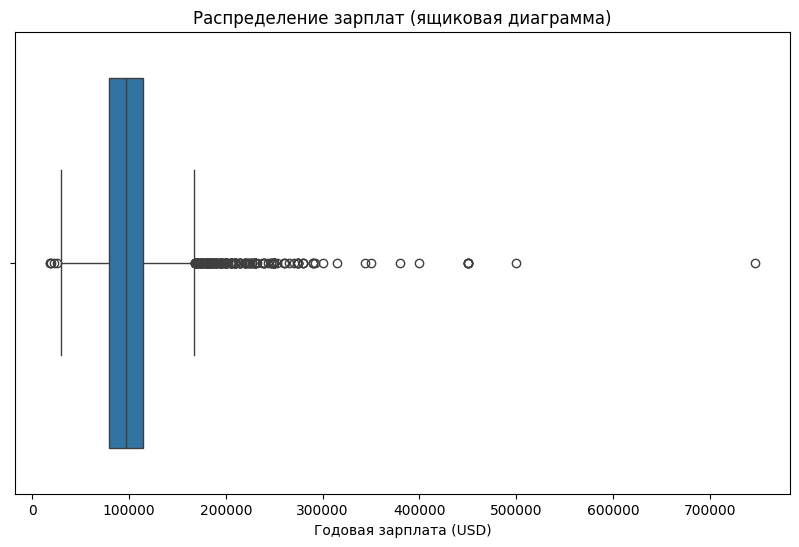

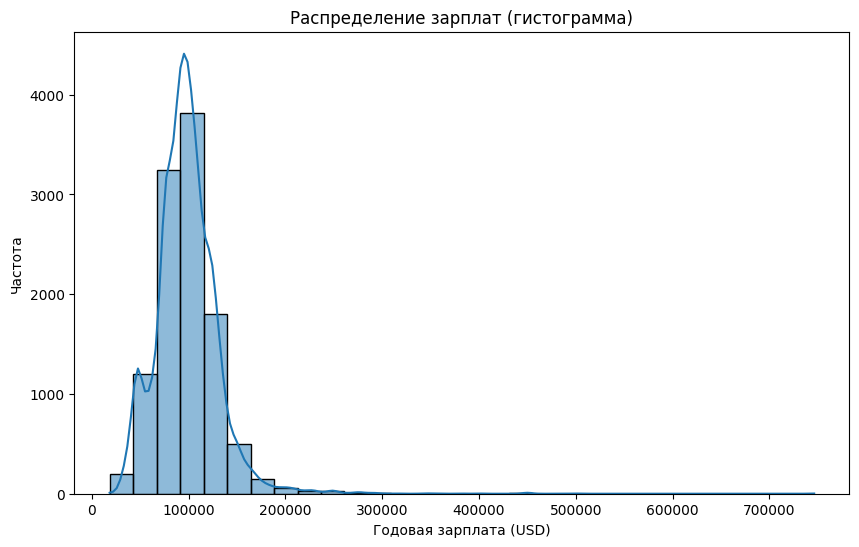


Статистика зарплат:
count     11036.000000
mean      98422.283585
std       32553.358842
min       18510.000000
25%       79186.000000
50%       97282.000000
75%      114556.100000
max      746323.000000
Name: WAGE_PER_YEAR, dtype: float64


In [144]:

# Визуализация распределения зарплат (ящиковая диаграмма)
plt.figure(figsize=(10, 6))
sns.boxplot(x=df['WAGE_PER_YEAR'])
plt.title('Распределение зарплат (ящиковая диаграмма)')
plt.xlabel('Годовая зарплата (USD)')
plt.show()
# Визуализация распределения зарплат (гистограмма)
plt.figure(figsize=(10, 6))
sns.histplot(df['WAGE_PER_YEAR'], kde=True, bins=30)
plt.title('Распределение зарплат (гистограмма)')
plt.xlabel('Годовая зарплата (USD)')
plt.ylabel('Частота')
plt.show()
print("\nСтатистика зарплат:")
print(df['WAGE_PER_YEAR'].describe())

### Выводы:  
1. **Средняя годовая зарплата:**  
   Средний уровень годовой зарплаты составляет **$98,422**, что соответствует достаточно высокому уровню доходов для большинства иностранных специалистов в США.  

2. **Распределение зарплат:**  
   - Распределение **правоскошенное**, что говорит о большем количестве высоких зарплат по сравнению с низкими.  
   - На гистограмме видно, что большинство зарплат сосредоточено в диапазоне от $60,000 до $120,000, но также есть существенная доля высокооплачиваемых специалистов.  

3. **Выбросы:**  
   - На ящиковой диаграмме четко выделяются **выбросы** в сторону больших зарплат.  
   - Одной из причин такого явления является отсутствие потолка зарплат, в то время как минимальная заработная плата регулируется законодательно.  
   - Люди редко соглашаются на зарплату ниже рыночного уровня, что ограничивает выбросы в нижней части распределения.  

### Общий вывод:  
Данные о зарплатах отражают реальную ситуацию на рынке труда США для иностранных граждан, с преобладанием среднего и высокого дохода. Большое количество высоких зарплат и правоскошенность распределения подтверждают наличие развитого рынка для квалифицированных специалистов.


# 2. Анализ корреляций  

В данном разделе были проанализированы взаимосвязи между основными переменными: зарплатой, опытом и уровнем образования. 

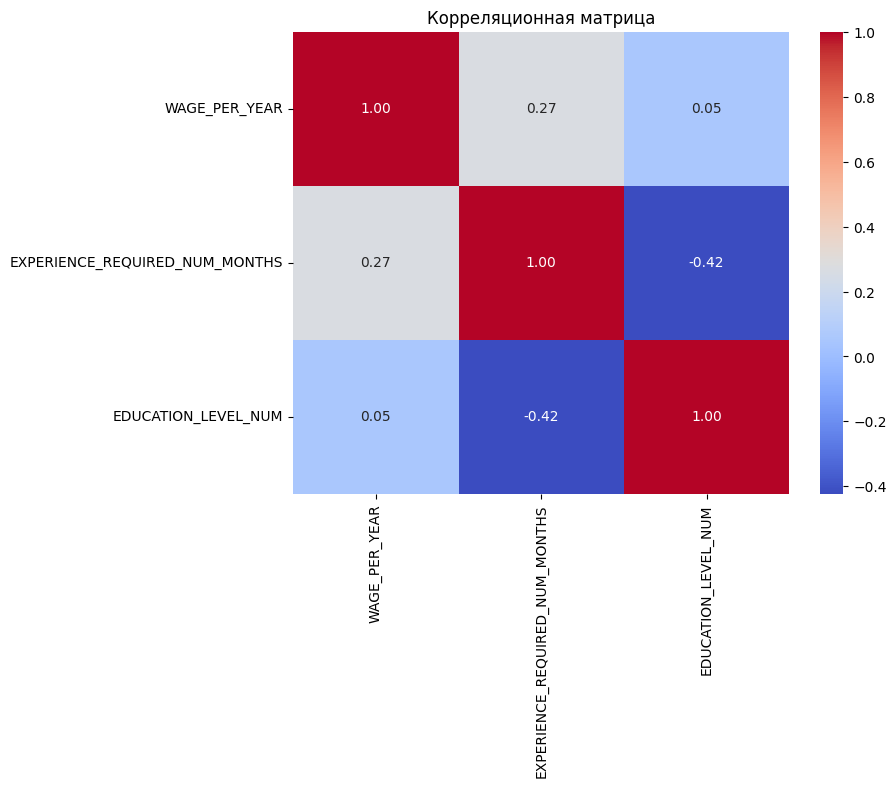

In [145]:
# --- Анализ корреляций ---
# Преобразование уровня образования в числовую форму для анализа
education_mapping = {
    'None': 0,
    'High School': 1,
    'Associate': 2,
    'Bachelor\'s': 3,
    'Master\'s': 4,
    'Doctorate': 5,
    'Other': 6
}
df['EDUCATION_LEVEL_NUM'] = df['EDUCATION_LEVEL_REQUIRED'].map(education_mapping)

# Построение корреляционной матрицы с дополнительными параметрами
corr_matrix = df[['WAGE_PER_YEAR', 
                  'EXPERIENCE_REQUIRED_NUM_MONTHS', 
                  'EDUCATION_LEVEL_NUM',
                  ]].corr()


# Визуализация корреляционной матрицы
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Корреляционная матрица')
plt.show()

 ### Результаты анализа:  

1. **Зарплата и требуемый опыт:**  
   - **Корреляция:** 0.27  
   - **Вывод:** Наблюдается слабая положительная корреляция, что свидетельствует о небольшом увеличении зарплаты с ростом требуемого опыта. Это подтверждает, что опыт работы играет роль в уровне доходов, но не является решающим фактором.  

2. **Зарплата и уровень образования:**  
   - **Корреляция:** 0.05  
   - **Вывод:** Почти полное отсутствие связи между уровнем образования и зарплатой. Это может указывать на то, что в некоторых сферах, особенно высокооплачиваемых, важнее навыки и опыт, а не формальное образование.  

3. **Требуемый опыт и уровень образования:**  
   - **Корреляция:** -0.42  
   - **Вывод:** Умеренная отрицательная корреляция показывает, что в вакансиях, где требуется больше опыта, реже предъявляются высокие требования к уровню образования. Это может объясняться тем, что работодатели делают ставку на опыт, компенсируя недостаток формального образования.  

### Общий вывод:  
- Уровень зарплаты в США среди иностранных граждан больше зависит от требуемого опыта, чем от уровня образования.  
- Требования к образованию и опыту часто взаимозаменяемы в вакансиях, что позволяет кандидатам компенсировать один фактор за счёт другого.

# 3. Исследовательский анализ данных (EDA)  

В данном разделе мы рассмотрели данные, связанные со средней зарплатой по профессии, национальности и уровню образования среди иностранных специалистов в США.  

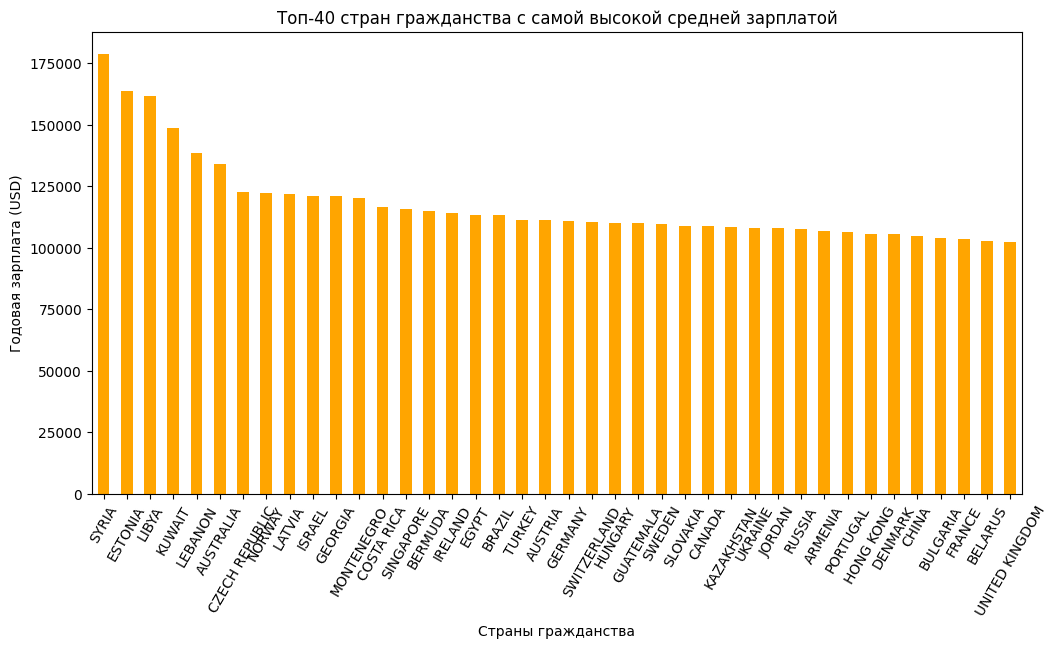

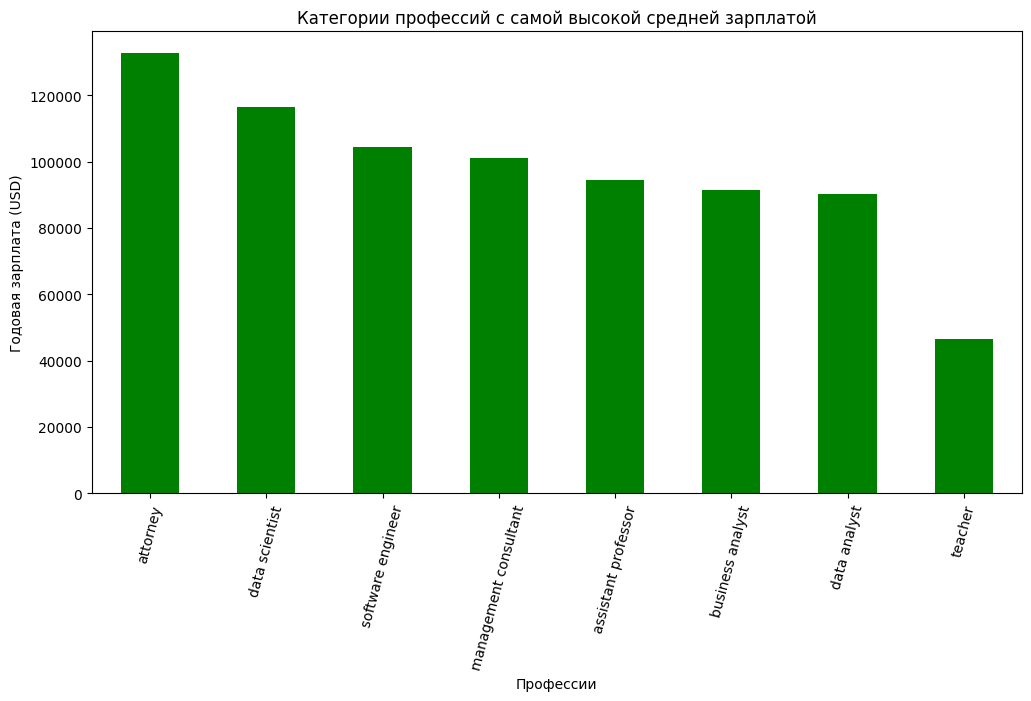

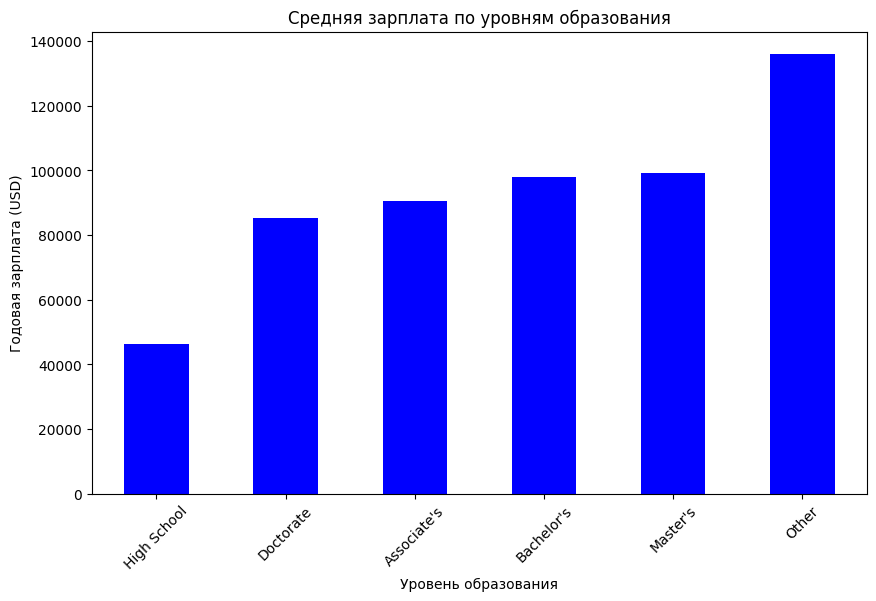

In [146]:
# Средняя зарплата по странам гражданства (национальностям)
nationality_salary = df.groupby('COUNTRY_OF_CITIZENSHIP')['WAGE_PER_YEAR'].mean().sort_values(ascending=False).head(40)

# Визуализация средней зарплаты по странам гражданства
plt.figure(figsize=(12, 6))
nationality_salary.plot(kind='bar', color='orange')
plt.title('Топ-40 стран гражданства с самой высокой средней зарплатой')
plt.ylabel('Годовая зарплата (USD)')
plt.xlabel('Страны гражданства')
plt.xticks(rotation=60)
plt.show()

# Средняя зарплата по профессиям
occupation_salary = df.groupby('JOB_TITLE_SUBGROUP')['WAGE_PER_YEAR'].mean().sort_values(ascending=False)

# Визуализация средней зарплаты по профессиям
plt.figure(figsize=(12, 6))
occupation_salary.plot(kind='bar', color='green')
plt.title('Категории профессий с самой высокой средней зарплатой')
plt.ylabel('Годовая зарплата (USD)')
plt.xlabel('Профессии')
plt.xticks(rotation=75)
plt.show()



# Средняя зарплата по уровням образования
education_salary = df.groupby('EDUCATION_LEVEL_REQUIRED')['WAGE_PER_YEAR'].mean().sort_values()
# Визуализация связи уровня образования с зарплатой
plt.figure(figsize=(10, 6))
education_salary.plot(kind='bar', color='blue')
plt.title('Средняя зарплата по уровням образования')
plt.ylabel('Годовая зарплата (USD)')
plt.xlabel('Уровень образования')
plt.xticks(rotation=45)
plt.show()


### Выводы:  
1. **Национальности:**  
   - Наибольшую среднюю зарплату среди иностранцев получают **граждане Сирии**.  

2. **Уровень образования:**  
   - Самый низкий уровень доходов наблюдается у людей без высшего образования. Это подчёркивает важность получения степени бакалавра или выше для успешной карьеры.  

3. **Профессии:**  
   - Наивысшие зарплаты зафиксированы в сферах, связанных с **юриспруденцией** и **IT**. Эти направления требуют высокой квалификации, что отражается на уровне доходов.  

### Общий вывод:  
Ваши шансы на более высокую зарплату как мигранта в США увеличиваются с получением высшего образования и выбором востребованной профессиональной сферы, например, IT или юриспруденции.

# 4. Географический анализ: где лучше искать работу?  

В данном разделе проведён анализ зависимости уровня зарплат, распределения вакансий и активности работодателей от географического положения.  

### Исследуемые аспекты:  
1. **Средняя зарплата по штатам.**  
2. **Распределение вакансий по штатам.**  
3. **Наиболее активные работодатели среди мигрантов.**  

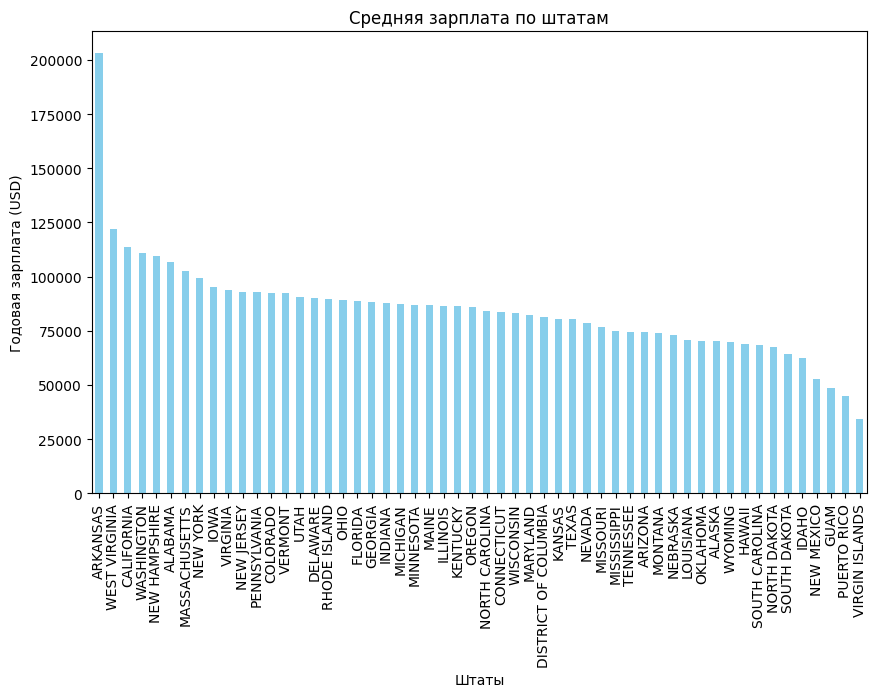

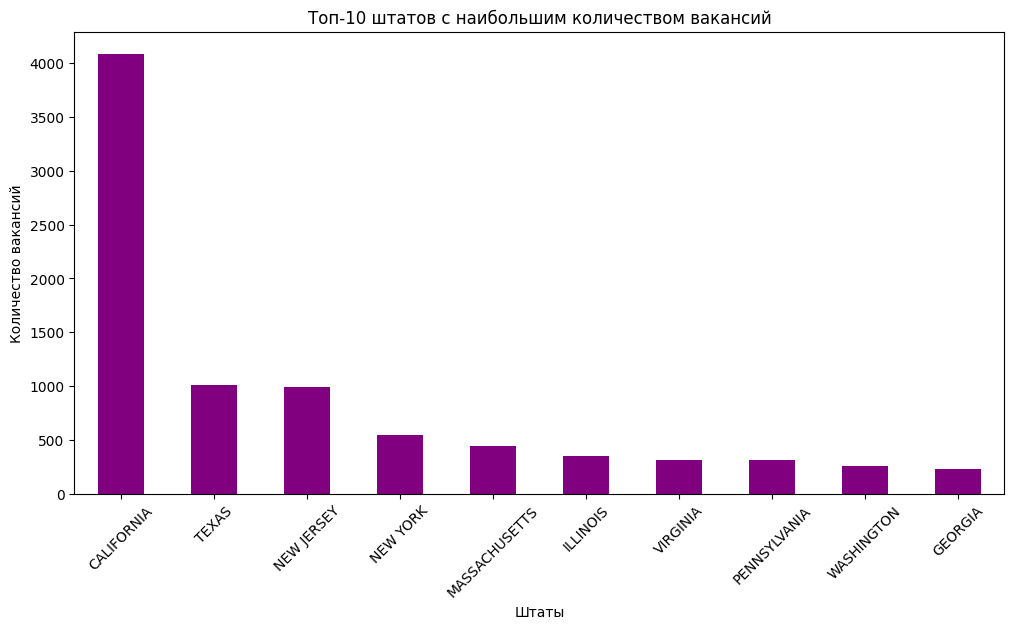

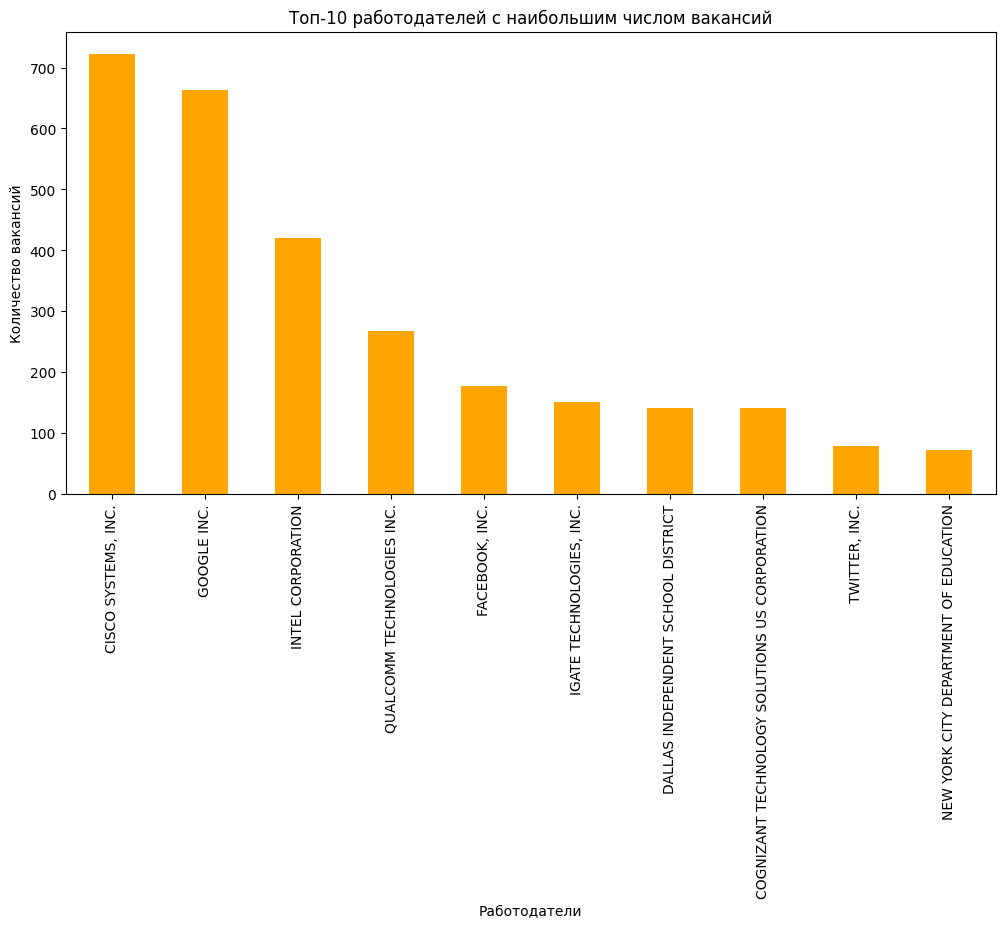

In [147]:
# Средняя зарплата по штатам
state_salary = df.groupby('WORK_STATE')['WAGE_PER_YEAR'].mean().sort_values(ascending=False)
# Визуализация средней зарплаты по штатам
plt.figure(figsize=(10, 6))
state_salary.plot(kind='bar', color='skyblue')
plt.title('Средняя зарплата по штатам')
plt.ylabel('Годовая зарплата (USD)')
plt.xlabel('Штаты')
plt.xticks(rotation=90)
plt.show()

# Количество вакансий по штатам
state_job_counts = df['WORK_STATE'].value_counts().head(10)
# Визуализация количества вакансий по штатам
plt.figure(figsize=(12, 6))
state_job_counts.plot(kind='bar', color='purple')
plt.title('Топ-10 штатов с наибольшим количеством вакансий')
plt.ylabel('Количество вакансий')
plt.xlabel('Штаты')
plt.xticks(rotation=45)
plt.show()

# Топ-10 работодателей по количеству вакансий
top_employers = df['EMPLOYER'].value_counts().head(10)
# Визуализация
plt.figure(figsize=(12, 6))
top_employers.plot(kind='bar', color='orange')
plt.title('Топ-10 работодателей с наибольшим числом вакансий')
plt.ylabel('Количество вакансий')
plt.xlabel('Работодатели')
plt.xticks(rotation=90)
plt.show()


### Выводы:  
1. **Средняя зарплата:**  
   - Самый высокооплачиваемый штат для мигрантов — **Арканзас**, за ним следуют **Вирджиния** и **Калифорния**.  

2. **Распределение вакансий:**  
   - **Калифорния** лидирует по количеству вакансий. Этот штат сочетает в себе высокую плотность работодателей и высокий уровень зарплат, что делает его особенно привлекательным для поиска работы.  

3. **Активность работодателей:**  
   - Большая часть вакансий приходится на **IT-компании** (например, Cisco, Google, Intel, Qualcomm, Facebook).  
   - Стремительное развитие IT-сферы объясняет лидирующую позицию Калифорнии по числу вакансий, так как в этом штате расположена **Кремниевая долина** — крупнейший мировой центр IT-компаний.  

### Общий вывод:  
Если вы хотите работать в США, то **Калифорния** — оптимальный штат для поиска работы. Здесь сосредоточено больше всего вакансий, а зарплаты остаются конкурентоспособными. Особенно благоприятны перспективы в IT-сфере, которая активно растёт и предлагает множество возможностей для мигрантов.

# 5. Анализ отказов в разрешении на работу  

### Объект анализа:  
В данном блоке рассмотрено, как следующие факторы влияют на вероятность получения разрешения на работу:  
1. **Год подачи заявления.**  
2. **Степень образования заявителя.**  
3. **Работодатель.**  

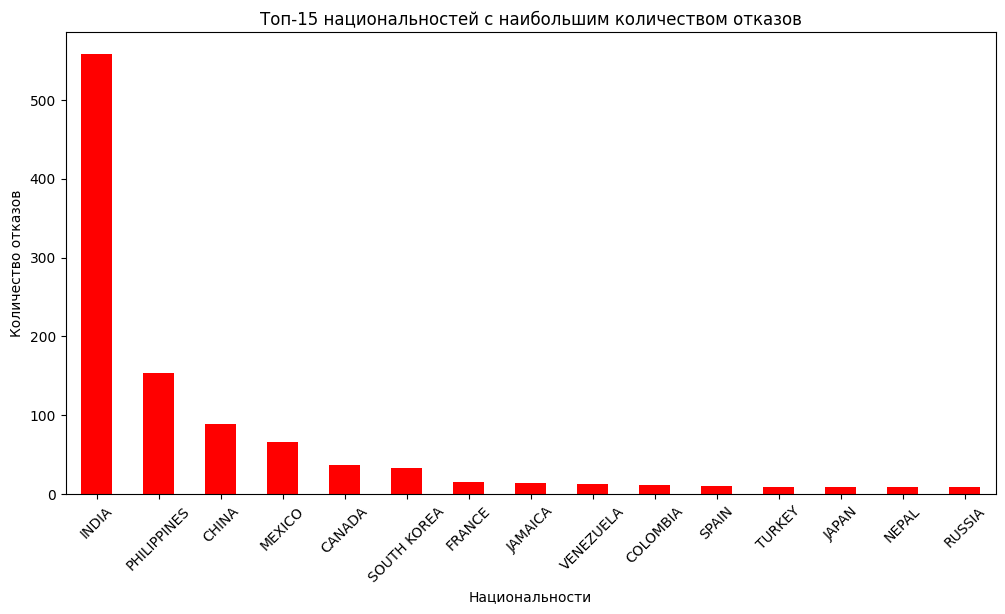

C:\Users\Ivan\AppData\Local\Temp\ipykernel_35340\3508527597.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  denied_cases['YEAR'] = denied_cases['CASE_DATE'].dt.year


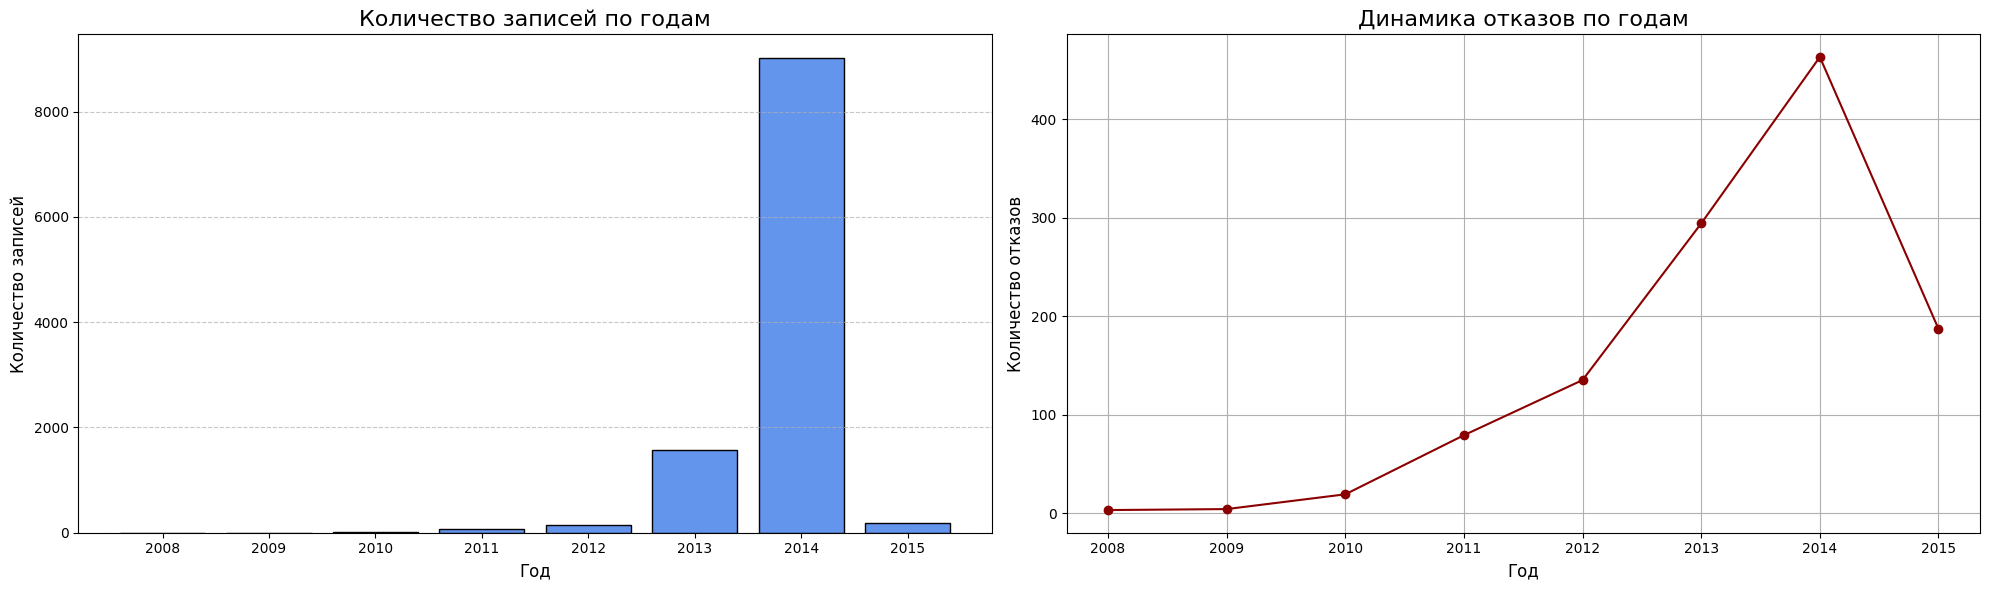

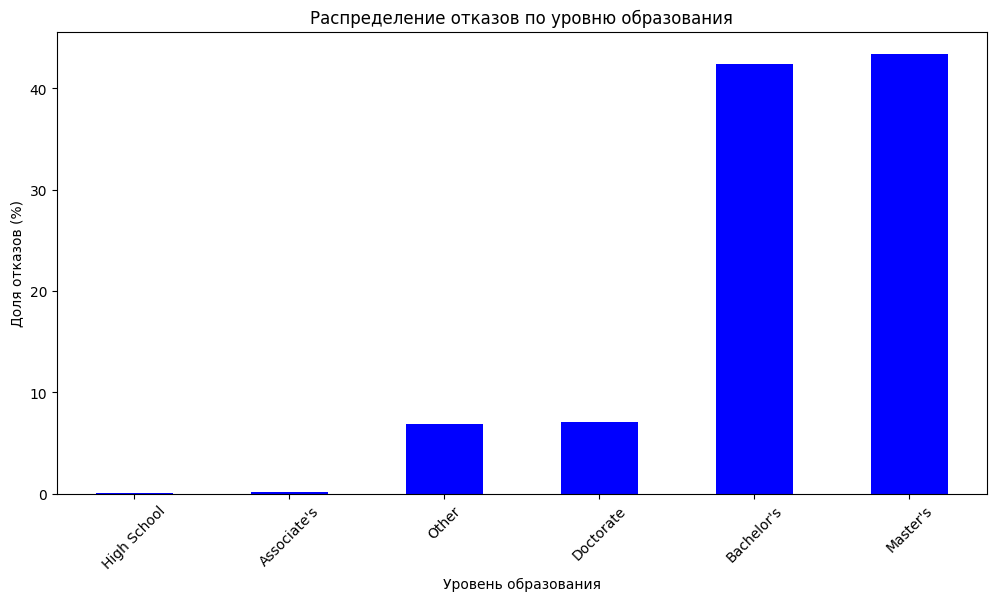

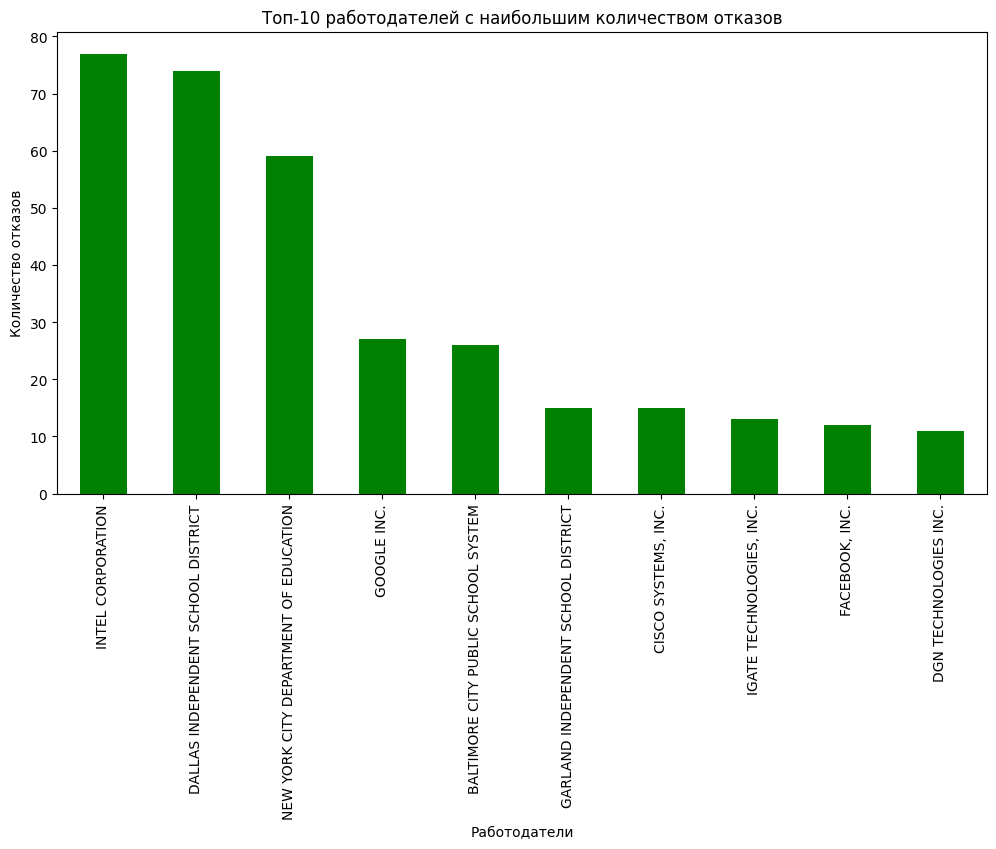

In [148]:
# Фильтр по отказам
denied_cases = df[df['CASE_STATUS'] == 'denied']

# Топ-10 национальностей с наибольшим количеством отказов
denied_nationalities = denied_cases['COUNTRY_OF_CITIZENSHIP'].value_counts().head(15)

# Визуализация
plt.figure(figsize=(12, 6))
denied_nationalities.plot(kind='bar', color='red')
plt.title('Топ-15 национальностей с наибольшим количеством отказов')
plt.ylabel('Количество отказов')
plt.xlabel('Национальности')
plt.xticks(rotation=45)
plt.show()

# Преобразование даты в год для упрощения анализа
df['YEAR'] = pd.to_datetime(df['CASE_DATE']).dt.year
denied_cases['YEAR'] = denied_cases['CASE_DATE'].dt.year

# Группировка по годам
records_by_year = df['YEAR'].value_counts().sort_index()
denied_by_year = denied_cases['YEAR'].value_counts().sort_index()

# Создание графиков
fig, axes = plt.subplots(1, 2, figsize=(20, 6), gridspec_kw={'width_ratios': [1, 1]})

# График всех записей по годам
axes[0].bar(records_by_year.index, records_by_year.values, color='cornflowerblue', edgecolor='black')
axes[0].set_title('Количество записей по годам', fontsize=16)
axes[0].set_xlabel('Год', fontsize=12)
axes[0].set_ylabel('Количество записей', fontsize=12)
axes[0].grid(axis='y', linestyle='--', alpha=0.7)

# График отказов по годам
axes[1].plot(denied_by_year.index, denied_by_year.values, marker='o', color='darkred')
axes[1].set_title('Динамика отказов по годам', fontsize=16)
axes[1].set_xlabel('Год', fontsize=12)
axes[1].set_ylabel('Количество отказов', fontsize=12)
axes[1].grid(True)

# Настройка внешнего вида
plt.tight_layout()
plt.show()

# Группировка данных по уровню образования
education_denial_rate = denied_cases['EDUCATION_LEVEL_REQUIRED'].value_counts(normalize=True) * 100
# Визуализация
plt.figure(figsize=(12, 6))
education_denial_rate.sort_values().plot(kind='bar', color='blue')
plt.title('Распределение отказов по уровню образования')
plt.ylabel('Доля отказов (%)')
plt.xlabel('Уровень образования')
plt.xticks(rotation=45)
plt.show()

# Топ-10 работодателей с отказами
denied_employers = denied_cases['EMPLOYER'].value_counts().head(10)
# Визуализация
plt.figure(figsize=(12, 6))
denied_employers.plot(kind='bar', color='green')
plt.title('Топ-10 работодателей с наибольшим количеством отказов')
plt.ylabel('Количество отказов')
plt.xlabel('Работодатели')
plt.xticks(rotation=90)
plt.show()



### Выводы:  
1. **Год подачи:**  
   - Анализ показал, что год подачи заявления не оказывает значимого влияния на вероятность получения разрешения. Динамика отказов остается относительно стабильной на протяжении лет.  

2. **Уровень образования:**  
   - Заметна зависимость между уровнем образования и вероятностью успешного получения разрешения. Чем выше степень образования заявителя, тем больше вероятность положительного решения. Это объясняется высокой востребованностью квалифицированных специалистов.  

3. **Гражданство:**  
   - Специалисты из Индии чаще всего получают отказы. Возможно, это связано с большим числом заявок, подаваемых из этой страны, или особенностями политики иммиграции в США.  

### Итог:  
Данный анализ подчеркивает важность уровня образования при подаче заявки на разрешение на работу. Он также указывает на необходимость дальнейшего изучения специфики отказов для граждан Индии и других стран.

# 6. Анализ специалистов из стран СНГ  

### Пункты анализа:  
1. **Распределение по штатам:**  
   Проведен анализ, показывающий, где преимущественно проживают и работают специалисты из стран СНГ. Выявлены штаты с наибольшей концентрацией таких сотрудников.  

2. **Категории профессий:**  
   Изучены категории профессий, в которых задействованы граждане СНГ. Это дает представление об их профессиональной специализации и востребованности на рынке труда США.  

3. **Популярные профессии:**  
   Определены наиболее распространенные профессии среди представителей СНГ, что позволяет понять, в каких направлениях они чаще всего находят работу.  

4. **Средняя заработная плата:**  
   Рассчитан средний уровень заработной платы по всем профессиям, а также по наиболее популярным категориям.  

### Цель анализа:  
Этот блок анализа помогает дать комплексное представление о том, в каких регионах и в каких профессиональных сферах наиболее успешно трудоустраиваются граждане СНГ, а также о том, каковы их финансовые перспективы.

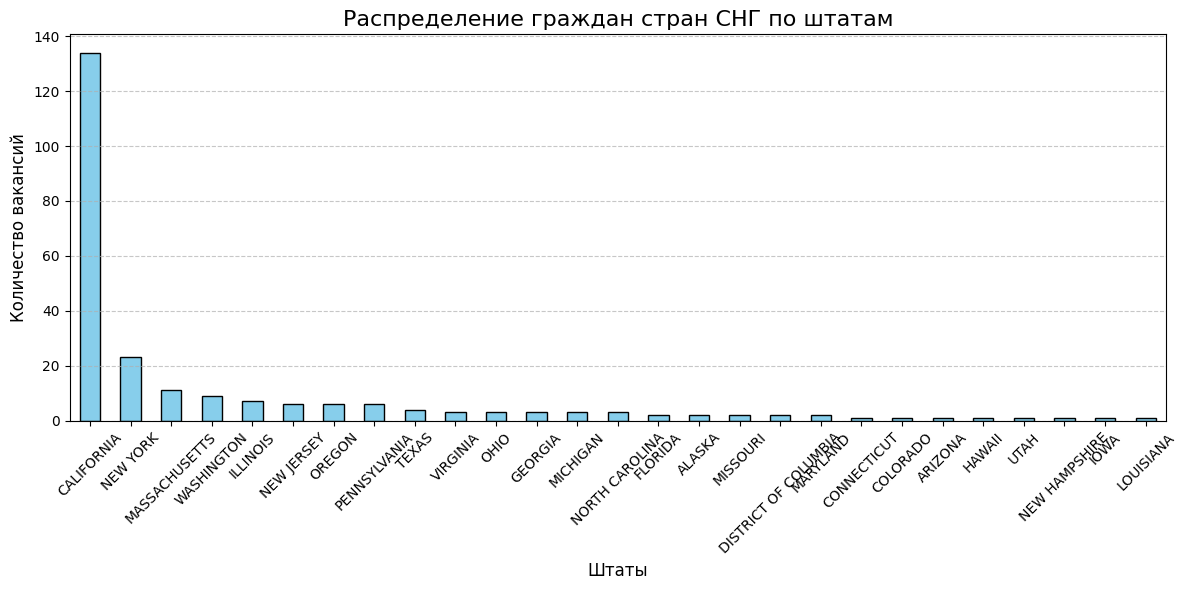

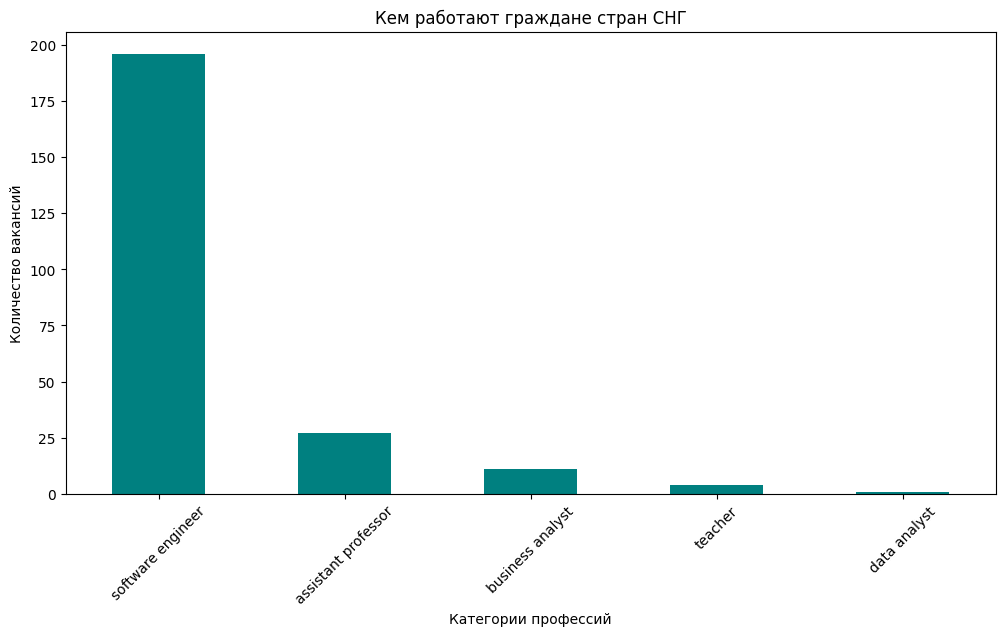

Средняя зарплата граждан стран СНГ: $105,818.14


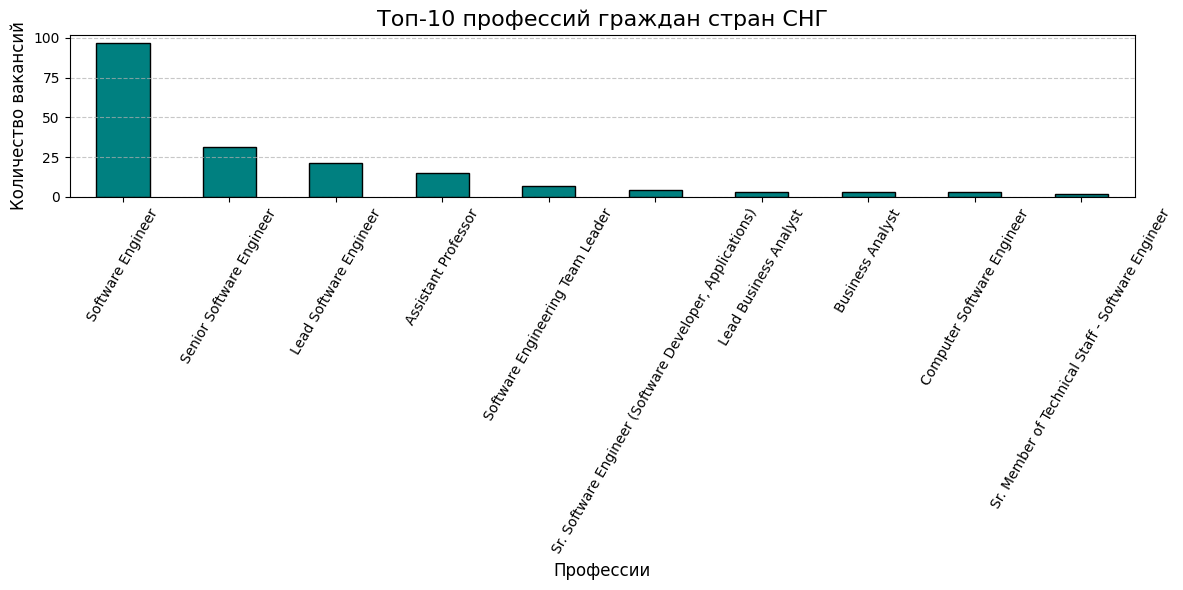

In [149]:
# Список стран СНГ
cis_countries = ['RUSSIA', 'UKRAINE', 'BELARUS', 'KAZAKHSTAN', 'UZBEKISTAN', 'ARMENIA', 'AZERBAIJAN', 'KYRGYZSTAN', 'MOLDOVA', 'TAJIKISTAN', 'TURKMENISTAN']

# Фильтр по гражданам стран СНГ
cis_df = df[df['COUNTRY_OF_CITIZENSHIP'].isin(cis_countries)]


cis_states_distribution = cis_df['WORK_STATE'].value_counts()

# Визуализация распределения по штатам
plt.figure(figsize=(12, 6))
cis_states_distribution.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Распределение граждан стран СНГ по штатам', fontsize=16)
plt.ylabel('Количество вакансий', fontsize=12)
plt.xlabel('Штаты', fontsize=12)
plt.xticks(rotation=45, fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# Распределение по категориям профессий
cis_jobs = cis_df['JOB_TITLE_SUBGROUP'].value_counts().head(10)

plt.figure(figsize=(12, 6))
cis_jobs.plot(kind='bar', color='teal')
plt.title('Кем работают граждане стран СНГ')
plt.ylabel('Количество вакансий')
plt.xlabel('Категории профессий')
plt.xticks(rotation=45)
plt.show()

# Средняя зарплата граждан СНГ
cis_salary = cis_df['WAGE_PER_YEAR'].mean()
print(f"Средняя зарплата граждан стран СНГ: ${cis_salary:,.2f}")

# Топ-10 профессий граждан СНГ
cis_top_jobs = cis_df['JOB_TITLE'].value_counts().head(10)

# Визуализация топ-10 профессий
plt.figure(figsize=(12, 6))
cis_top_jobs.plot(kind='bar', color='teal', edgecolor='black')
plt.title('Топ-10 профессий граждан стран СНГ', fontsize=16)
plt.ylabel('Количество вакансий', fontsize=12)
plt.xlabel('Профессии', fontsize=12)
plt.xticks(rotation=60, fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()





### Выводы по новым графикам:

1. **Распределение граждан СНГ по штатам**:  
   - **Калифорния** лидирует с огромным отрывом по количеству вакансий.  
   - Другие заметные штаты: **Нью-Йорк**, **Массачусетс**, **Вашингтон** и **Иллинойс**.  
   Это подтверждает значительную концентрацию вакансий в регионах с высокоразвитой IT-инфраструктурой.

2. **Профессии граждан СНГ**:  
   - **Software Engineer** — абсолютный лидер среди профессий (почти 200 вакансий).  
   - Далее с большим отрывом следуют **Assistant Professor**, **Business Analyst**, **Teacher** и **Data Analyst**.  
   Большинство граждан СНГ заняты в **технологической сфере**, что объясняет их востребованность на рынке труда США.

**Итог**: Основная концентрация вакансий для граждан СНГ сосредоточена в Калифорнии и в IT-профессиях, особенно на позициях **Software Engineer**.

# 7. Анализ заработных плат граждан СНГ  

### Пункты анализа:  
1. **Сравнение с другими мигрантами:**  
   Граждане СНГ получили возможность быть оцененными в сравнении с мигрантами из других стран. Мы определили средний уровень их зарплат и сравнили с общей миграционной выборкой.  

2. **Штаты, где больше всего ценят сотрудников из СНГ:**  
   Был проведен анализ, показывающий, в каких штатах сотрудники из стран СНГ получают наивысшие зарплаты. Это позволяет определить регионы с наибольшей востребованностью и высокими ставками для таких специалистов.  

3. **Средние зарплаты по вакансиям:**  
   Мы выделили наиболее распространенные профессии для граждан СНГ и рассчитали средний уровень оплаты по каждой из них.  

4. **Средний опыт работы:**  
   Было изучено, какой опыт требуется для различных профессий среди граждан СНГ, что позволяет оценить квалификационные требования к таким сотрудникам.  

### Цель анализа:  
Этот исследовательский блок помогает выявить ключевые закономерности в уровне заработных плат, географической концентрации и требованиях к профессиональному опыту для граждан СНГ.

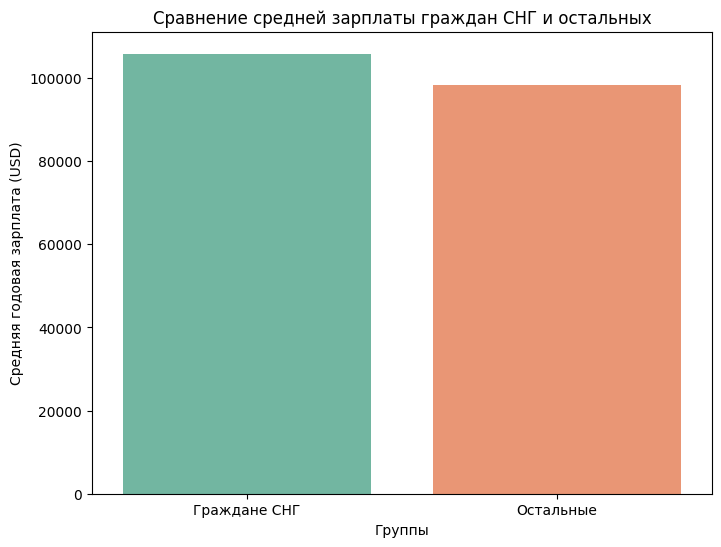

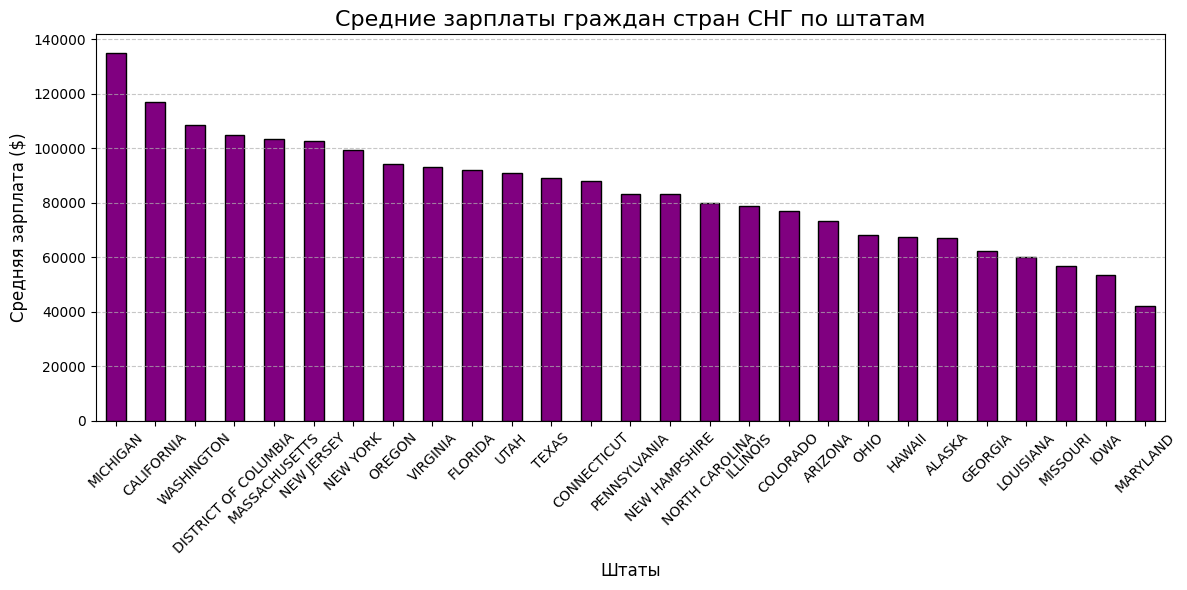

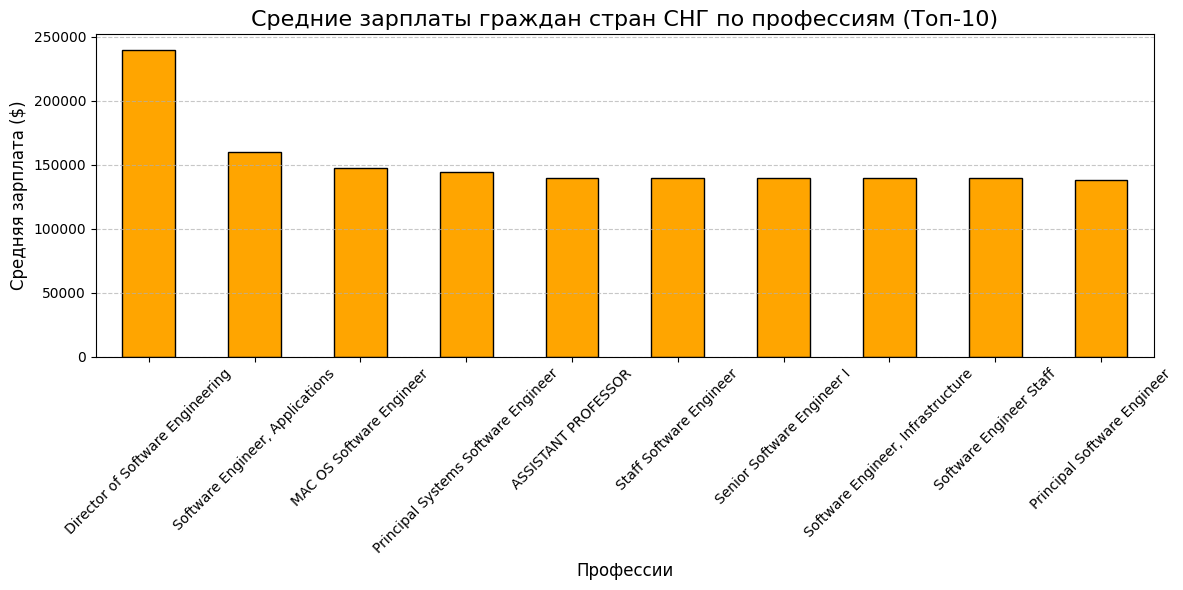

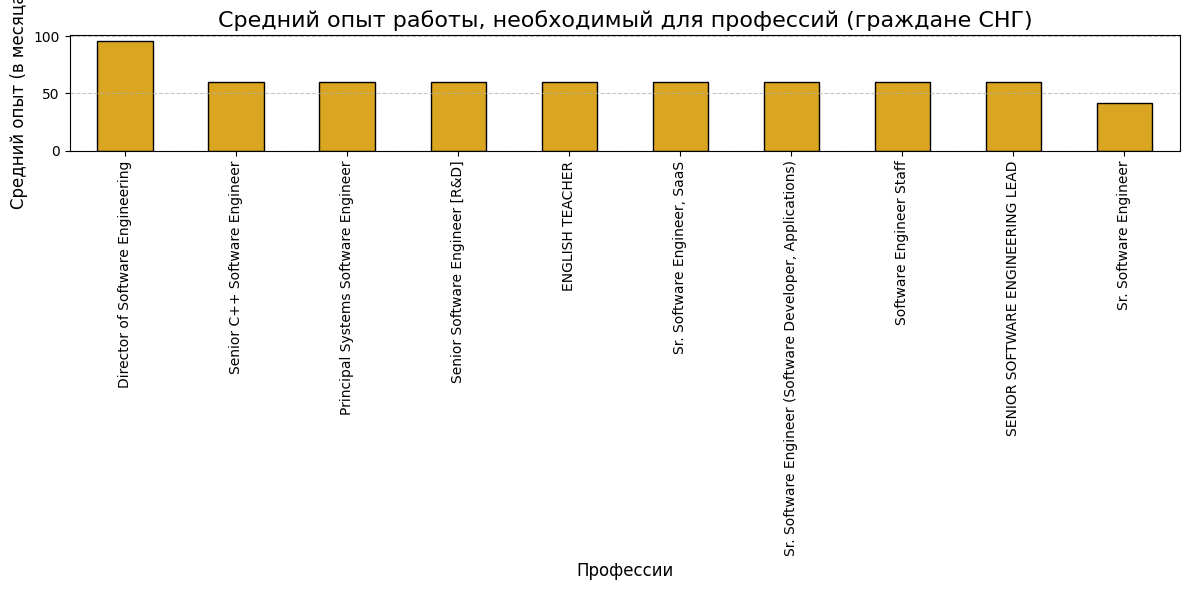

In [150]:
cis_salary_avg = cis_df['WAGE_PER_YEAR'].mean()
others_salary_avg = df[~df['COUNTRY_OF_CITIZENSHIP'].isin(cis_countries)]['WAGE_PER_YEAR'].mean()

# Визуализация сравнения
salaries_comparison = pd.DataFrame({
    'Группы': ['Граждане СНГ', 'Остальные'],
    'Средняя зарплата': [cis_salary_avg, others_salary_avg]
})

plt.figure(figsize=(8, 6))
sns.barplot(x='Группы', y='Средняя зарплата', data=salaries_comparison, palette='Set2',hue = [0,1],legend=False)
plt.title('Сравнение средней зарплаты граждан СНГ и остальных')
plt.ylabel('Средняя годовая зарплата (USD)')
plt.show()

# Средние зарплаты граждан СНГ по штатам
cis_salary_by_state = cis_df.groupby('WORK_STATE')['WAGE_PER_YEAR'].mean().sort_values(ascending=False)

# Визуализация средних зарплат
plt.figure(figsize=(12, 6))
cis_salary_by_state.plot(kind='bar', color='purple', edgecolor='black')
plt.title('Средние зарплаты граждан стран СНГ по штатам', fontsize=16)
plt.ylabel('Средняя зарплата ($)', fontsize=12)
plt.xlabel('Штаты', fontsize=12)
plt.xticks(rotation=45, fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# Средние зарплаты граждан СНГ по профессиям (топ-10)
cis_salary_by_job = cis_df.groupby('JOB_TITLE')['WAGE_PER_YEAR'].mean().sort_values(ascending=False).head(10)

# Визуализация средних зарплат по профессиям
plt.figure(figsize=(12, 6))
cis_salary_by_job.plot(kind='bar', color='orange', edgecolor='black')
plt.title('Средние зарплаты граждан стран СНГ по профессиям (Топ-10)', fontsize=16)
plt.ylabel('Средняя зарплата ($)', fontsize=12)
plt.xlabel('Профессии', fontsize=12)
plt.xticks(rotation=45, fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# Средний опыт работы по профессиям среди граждан СНГ
experience_by_job = (
    cis_df.groupby('JOB_TITLE')['EXPERIENCE_REQUIRED_NUM_MONTHS']
    .mean()
    .sort_values(ascending=False)
    .head(10)
)

# Визуализация
plt.figure(figsize=(12, 6))
experience_by_job.plot(kind='bar', color='goldenrod', edgecolor='black')
plt.title('Средний опыт работы, необходимый для профессий (граждане СНГ)', fontsize=16)
plt.ylabel('Средний опыт (в месяцах)', fontsize=12)
plt.xlabel('Профессии', fontsize=12)
plt.xticks(rotation=90, fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


### Выводы:

1. **Сравнение зарплат**:  
   Зарплаты граждан СНГ **немного выше**, чем у остальных мигрантов, что подтверждает их востребованность на рынке труда США.

2. **Штаты с высокими зарплатами**:  
   - **Лидеры**: Michigan, California, Washington.  
   - **Аутсайдеры**: Missouri, Iowa, Maryland.  
   Высокие зарплаты сосредоточены в штатах с развитой IT-инфраструктурой.

3. **Топ профессий по зарплатам**:  
   - Самые высокие зарплаты в **IT-сфере**:  
     - **Director of Software Engineering** ($240,000+).  
     - Другие высокие позиции: Software Engineers и MAC OS Software Engineer.

4. **Требуемый опыт**:  
   - **Топовые позиции** требуют **6–9 лет опыта** (до 100 месяцев).  
   - Средний опыт для высокооплачиваемых профессий — около 5 лет.

**Итог**: Граждане СНГ получают конкурентоспособные зарплаты, особенно в технологических профессиях, с высокой концентрацией в штатах-лидерах (Michigan, California, Washington).

# 8. Где лучше жить и работать: США или Россия?  

Для сравнения уровня жизни в США и России была использована статистика из открытых источников, включая данные Росстата и официальный курс доллара от Центрального банка РФ. В расчетах учитывалась средняя зарплата учителей и IT-специалистов в 2014 году. Согласно этим данным:  

- Средняя зарплата учителя в России составляла **32,611 рублей** в месяц.  
- Средняя зарплата IT-специалиста — **120,000 рублей** в месяц.  
- Курс доллара на начало 2014 года был **35 рублей за доллар**.  

### Учет стоимости жизни  
Для большей объективности мы скорректировали заработные платы с учетом индекса стоимости жизни. Данные для расчета были взяты с платформы [Numbeo](https://www.numbeo.com/cost-of-living/):  

- Индекс стоимости жизни для России: **0.5** (относительно базового уровня).  
- Индекс стоимости жизни для США: **1** (базовый уровень).  

### Методика расчета  
Скорректированная зарплата рассчитывалась путем деления номинальной зарплаты на индекс стоимости жизни.  

Таким образом, мы смогли сравнить не только номинальные доходы, но и реальный уровень покупательной способности в двух странах.


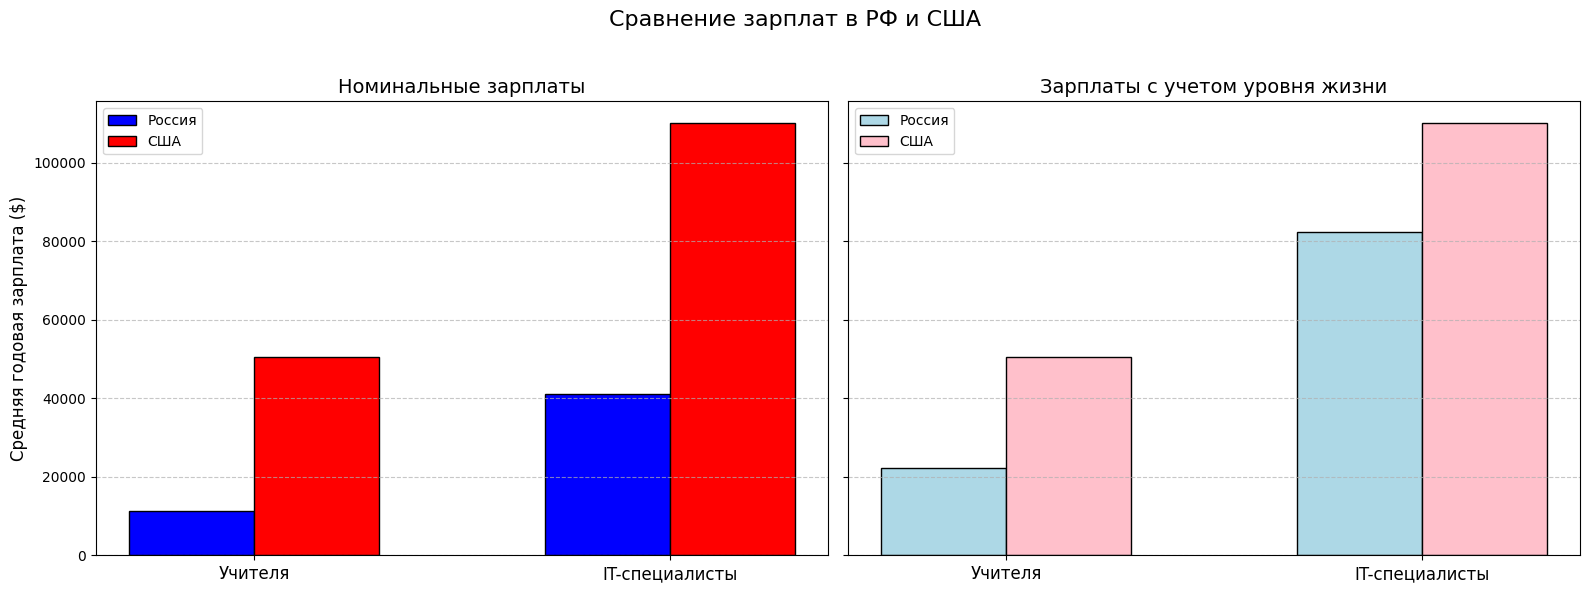

Учителя: Разница (номинальная) $39,331.59, Разница (с учетом уровня жизни) $28,150.67
IT-специалисты: Разница (номинальная) $69,059.39, Разница (с учетом уровня жизни) $27,916.54


In [151]:
import matplotlib.pyplot as plt
import numpy as np

# Средние зарплаты
salaries = {
    'Учителя': {
        'Россия': 32611/35*12,
        'США': cis_df[cis_df['JOB_TITLE'].str.contains('teacher', case=False, na=False)]['WAGE_PER_YEAR'].mean()
    },
    'IT-специалисты': {
        'Россия': 120000/35*12,
        'США': cis_df[cis_df['JOB_TITLE'].str.contains('developer|software|engineer|IT', case=False, na=False)]['WAGE_PER_YEAR'].mean()
    }
}

# Индекс стоимости жизни
cost_of_living = {'Россия': 0.5, 'США': 1.0}

# Скорректированные зарплаты
adjusted_salaries = {
    profession: {
        region: salary / cost_of_living[region]
        for region, salary in salaries[profession].items()
    }
    for profession in salaries
}

# Подготовка данных для графиков
labels = ['Учителя', 'IT-специалисты']
russia_nominal = [salaries[prof]['Россия'] for prof in labels]
usa_nominal = [salaries[prof]['США'] for prof in labels]
russia_adjusted = [adjusted_salaries[prof]['Россия'] for prof in labels]
usa_adjusted = [adjusted_salaries[prof]['США'] for prof in labels]

x = np.arange(len(labels))  # метки для групп
width = 0.3  # ширина столбцов

# Создание графика для номинальных зарплат
fig, ax = plt.subplots(1, 2, figsize=(16, 6), sharey=True)

# Номинальные зарплаты
ax[0].bar(x - width / 2, russia_nominal, width, label='Россия', color='blue', edgecolor='black')
ax[0].bar(x + width / 2, usa_nominal, width, label='США', color='red', edgecolor='black')
ax[0].set_title('Номинальные зарплаты', fontsize=14)
ax[0].set_ylabel('Средняя годовая зарплата ($)', fontsize=12)
ax[0].set_xticks(x)
ax[0].set_xticklabels(labels, fontsize=12)
ax[0].legend(fontsize=10)
ax[0].grid(axis='y', linestyle='--', alpha=0.7)

# Скорректированные зарплаты
ax[1].bar(x - width / 2, russia_adjusted, width, label='Россия', color='lightblue', edgecolor='black')
ax[1].bar(x + width / 2, usa_adjusted, width, label='США', color='pink', edgecolor='black')
ax[1].set_title('Зарплаты с учетом уровня жизни', fontsize=14)
ax[1].set_xticks(x)
ax[1].set_xticklabels(labels, fontsize=12)
ax[1].legend(fontsize=10)
ax[1].grid(axis='y', linestyle='--', alpha=0.7)

# Настройка макета
plt.suptitle('Сравнение зарплат в РФ и США', fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

# Разница для каждого случая
for prof in labels:
    diff_nominal = salaries[prof]['США'] - salaries[prof]['Россия']
    diff_adjusted = adjusted_salaries[prof]['США'] - adjusted_salaries[prof]['Россия']
    print(f"{prof}: Разница (номинальная) ${diff_nominal:,.2f}, Разница (с учетом уровня жизни) ${diff_adjusted:,.2f}")

Вывод по сравнению зарплат учителей и IT-специалистов в РФ и США
Учителя:

Номинальная разница в зарплатах между РФ и США составляет $39,331.59 в пользу США.
С учетом уровня жизни разница сокращается до $28,150.67, но все еще остается значительной.
Это указывает на существенно более высокую оплату труда учителей в США даже с учетом различных расходов на жизнь.
IT-специалисты:

Номинальная разница в зарплатах между РФ и США достигает $69,059.39 в пользу США.
С учетом уровня жизни разница снижается до $27,916.54, что также подтверждает превосходство доходов IT-специалистов в США.
Общий вывод:
Сравнение демонстрирует, что, хотя США предлагают значительно более высокие номинальные зарплаты как для учителей, так и для IT-специалистов, корректировка на уровень жизни сокращает разрыв, но не устраняет его. Разница особенно заметна для IT-специалистов, что отражает высокую ценность данной профессии на американском рынке труда. Учителя, несмотря на меньшую номинальную разницу, также выигрывают от американской системы оплаты труда, что может служить мотивацией для эмиграции или международного трудового сотрудничества.


 # 9 Итоговый вывод по проекту  

Целью исследования было выявить особенности рынка труда для мигрантов в США, с фокусом на граждан СНГ. На основе анализа данных были сделаны следующие выводы:  

1. **Общие тенденции**:  
   - Средние зарплаты граждан СНГ **немного выше**, чем у остальных мигрантов, что подтверждает их конкурентоспособность и востребованность на рынке труда США.  
   - В топе по оплате труда находятся специалисты из сфер **IT** и **юриспруденции**.  

2. **Географический анализ**:  
   - Большая часть граждан СНГ работает в **Калифорнии**, которая лидирует по количеству вакансий. Также заметны **Нью-Йорк** и **Массачусетс**.  
   - Штаты с самыми высокими зарплатами: **Мичиган**, **Калифорния**, **Вашингтон**.  
   Эти регионы обеспечивают высокий спрос на высококвалифицированных специалистов, особенно в **технологическом секторе**.  

3. **Профессиональный анализ**:  
   - Абсолютным лидером среди профессий является **Software Engineer**, что отражает тенденции глобального роста IT-сферы.  
   - Наиболее высокооплачиваемые должности: **Director of Software Engineering** и другие руководящие позиции в IT.  
   - Средний требуемый опыт работы для топовых профессий составляет **5–9 лет**.  

4. **Сравнение с Россией:**  
   - Учителя и IT-специалисты в США зарабатывают значительно больше, чем в России, даже с учетом индекса стоимости жизни. Разница для учителей составила $28,150.67, а для IT-специалистов — $27,916.54. 

**Заключение**:  
Граждане СНГ успешно интегрируются на рынке труда США, преимущественно занимая позиции в **технологическом секторе** и работая в штатах с развитой IT-инфраструктурой. Калифорния остается ключевым регионом по количеству и уровню зарплат для таких специалистов, что делает её наиболее перспективным направлением для поиска работы. Сравнение с Россией демонстрирует значительное преимущество американского рынка труда по уровню доходов.
